Importing pandas ; Importing numpy ; Importing seaborn ; Importing matplotlib ; Importing monthly progress prediction by book value

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_progress=pd.read_csv('../../data/output/monthly-progress-by-book-value.csv',sep=';')

Creating the mean columns of progress dataframe

In [65]:
years=df_progress['Year'].unique()
prediction_interval=range(2,6)

df_progress = df_progress.set_index(['Year', 'Month'])

for year in years:
    index_year,index_month=df_progress.index.get_level_values('Year'),df_progress.loc[year].index.get_level_values('Month')
    for interval in prediction_interval:
        if year-interval<min(years):
            series_mean=np.nan
        else :
            series_mean=df_progress[(index_year<year)&(index_year>=year-interval)].groupby('Month')['Progress'].mean()
            for month in index_month:
                df_progress.loc[(year,month),str(interval)+' Mean']=series_mean[month]

Finding correlation between progress and mean prediction

In [66]:
for _,col in enumerate(df_progress.columns[2:]):
    print('Correlation between Progress and',col)
    print(df_progress['Progress'].corr(df_progress[col]),'\n')

Correlation between Progress and 3 Mean
0.15886503273924188 

Correlation between Progress and 4 Mean
0.2058783265908003 

Correlation between Progress and 5 Mean
0.31382355441831983 



Creating error mean dataframe ; Calculating the error mean

In [67]:
df_error_mean=pd.DataFrame(index=df_progress.index)

for interval in prediction_interval:
    df_error_mean[str(interval)+' Error']=(df_progress[str(interval)+' Mean']-df_progress['Progress'])/df_progress['Progress']


Visualizing error dataframe outliers

<Axes: >

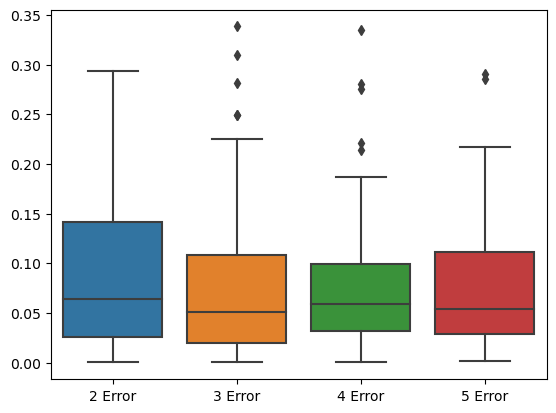

In [68]:
# the df_error_mean is not absolute due to the importance of error direction
sns.boxplot(data=df_error_mean.abs())

Cleaning the error dataframe

<Axes: >

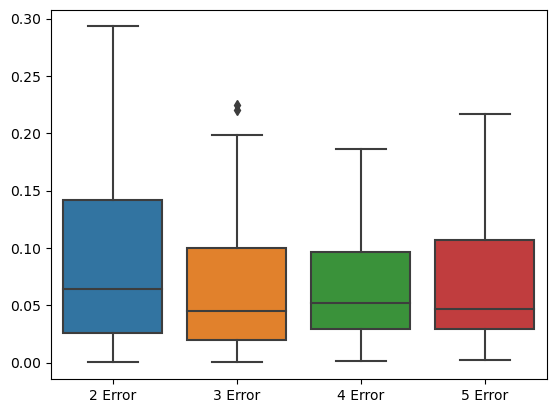

In [69]:
for i,col in enumerate(df_error_mean.columns):
    Q1 = df_error_mean[col].abs().quantile(0.25)
    Q3 = df_error_mean[col].abs().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask=(df_error_mean[col].abs()<lower_bound)|(df_error_mean[col].abs()>upper_bound)
    df_error_mean[col]=df_error_mean[col].mask(outlier_mask)
sns.boxplot(data=df_error_mean.abs())

Calculating the error mean after cleaning

In [70]:
print(df_error_mean.abs().mean())

2 Error    0.088046
3 Error    0.065405
4 Error    0.065833
5 Error    0.067642
dtype: float64


Calculating monthly error auto correlation

In [71]:
lags=range(1,4)

for lag in lags:
    auto_corr=0;
    for _,col in enumerate(df_error_mean.columns):
        auto_corr+=df_error_mean[col].autocorr(lag)
    print('Auto-correlation at lag',lag)
    print(auto_corr/len(df_error_mean.columns),'\n')


Auto-correlation at lag 1
0.7789570004880233 

Auto-correlation at lag 2
0.6114282272954328 

Auto-correlation at lag 3
0.45462119155606423 



Updating the progress dataframe to csv ; Exporting the erroe mean dataframe to csv

In [72]:
df_progress.to_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')
df_error_mean.to_csv('../data/output/monthly-progress-by-book-value-error.csv',sep=';')